In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch, torchvision
import kornia as K

In [2]:
img_bgr: np.ndarray = cv2.imread('./data/doraemon.png', cv2.IMREAD_COLOR)

In [6]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr) # CxHxWx. Tensor변환
x_bgr = x_bgr[None, ...].float() / 255. # Image Normalize

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr) 
x_gray = K.color.rgb_to_grayscale(x_rgb)

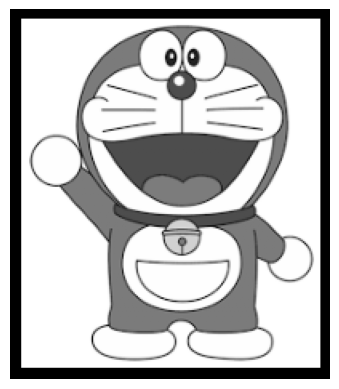

In [7]:
# Image를 Tensor변환, 시각화
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()
    
imshow(x_gray)

## 1st order derivates

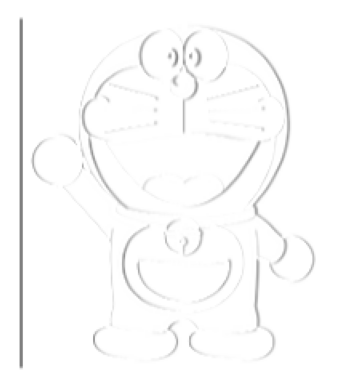

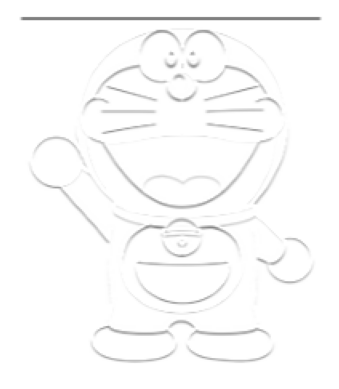

In [9]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

# Show 1st derivatives in x
imshow(1. -grads_x.clamp(0., 1.,))

# Show 1st derivatives in y
imshow(1. -grads_y.clamp(0., 1.,))

## 2nd order derivates

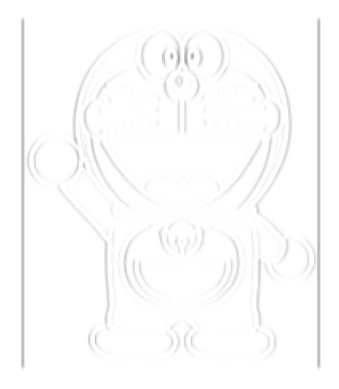

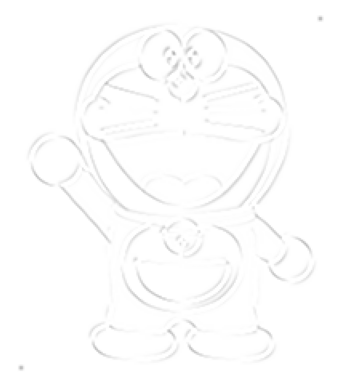

In [11]:
# Laplacian
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=2)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

# Show 2nd derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

# Show 2nd derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## Sobel Edges

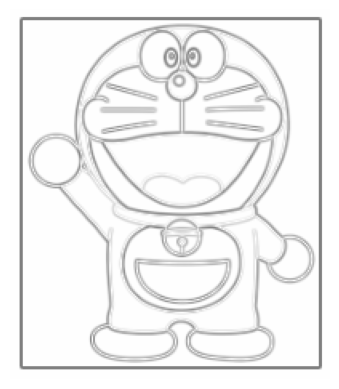

In [13]:
x_sobel: torch.Tensor = K.filters.sobel(x_gray)
imshow(1. - x_sobel)

## Laplacian Edges

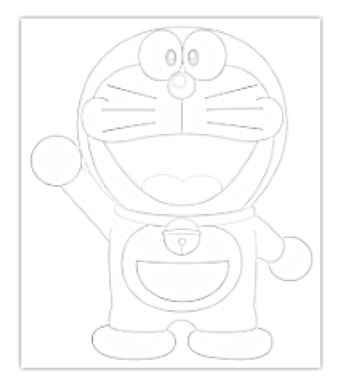

In [18]:
x_laplacian: torch.Tensor = K.filters.laplacian(x_gray, kernel_size=5) # blur 정도
imshow(1. - x_laplacian.clamp(0., 1.))

## Canny Edges

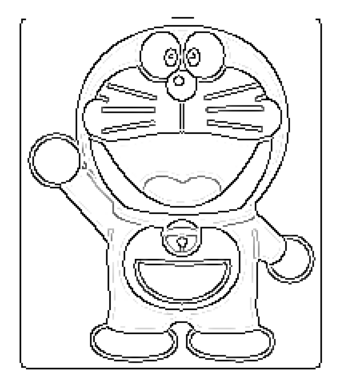

In [15]:
x_canny: torch.Tensor = K.filters.canny(x_gray)[0]
imshow(1. - x_canny.clamp(0., 1.))